<a href="https://colab.research.google.com/github/rajayourfriend/AI6-Assignments/blob/master/EVA_Assignment4_Second_Optimizer_Epochs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### First - Vanilla
* basic architecture

  val_acc got = 97.9
  
## Second 
* Change in optimizer
* Increase in number of epochs

  val_acc got = 98.6

### Third
* Dropout
* Batch Normalization

### Fourth
* Batch size
* Learning rate

# **Import Libraries and modules**

In [0]:
#install keras through pip and import keras
# https://keras.io/
!pip install -q keras
import keras

In [0]:
#import required libraries
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.utils.vis_utils import plot_model

from keras.datasets import mnist

USE_GOOGLE_DRIVE = 0
#mount google drive so that some files can be saved or retrieved
if USE_GOOGLE_DRIVE:
    from google.colab import drive
    drive.mount('/gdrive')

### Load pre-shuffled MNIST data into train and test sets

In [0]:
#get data from MNIST and assign to proper values
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


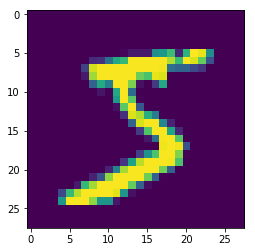

In [0]:
#print a sample image from input training data
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
#convert all the input training data and input test data to one dimension, 28x28x1
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
#assign type for input training data and input test data
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
#divide the input training data and input test data with max value of a pixel
X_train /= 255
X_test /= 255

In [0]:
#print output of training data for the initial 10
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
#print output of training data for the initial 10 after converting to categorical 10-dimensional matrices
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
#import batch normalization from keras
from keras.layers.normalization import BatchNormalization

In [0]:
#import Activation from keras
from keras.layers import Activation
#model initialized with Sequential
model = Sequential()

#all 3x3 kernel layers are followed by batch normalization and relu activation
#last few layers are experimented with Dropout !

#General convention for all the succeeding layers
#(input) (c) (kernel) => (output)

a = 10
b = 15
c = 10
# a=4 & c=10 gives almost equal performance as k=4 & m=20 => val_acc = 97% 
# a=10 & c=20 gives 99%
#a = 10
#c = 20

#first one is input layer
#(28x28x1) (c) (3x3x1)x8 => (26x26x8)
model.add(Convolution2D(a, 3, 3, input_shape=(28,28,1))) #8 here is good

#(26x26x8) (c) (3x3x1)x8 => (24x24x8)
model.add(Convolution2D(b, 3, 3, activation='relu')) # 8 here is okk

#(24x24x8) (c) (3x3x1)x8 => (22x22x8)
model.add(Convolution2D(c, 3, 3, activation='relu')) # 8 here is okk

#(22x22x8) (c) (3x3x1)x8 => (20x20x8)
model.add(Convolution2D(b, 3, 3, activation='relu')) # 8 here is good

#(20x20x8) (c) (3x3x1)x8 => (18x18x8)
model.add(Convolution2D(a, 3, 3, activation='relu')) #8 here is bad

#Transition block that contains MP and 1x1
#MaxPooling layer
#(18x18x8) (c) (2x2) => (9x9x8)
model.add(MaxPooling2D(pool_size=(2, 2)))
#(9x9x8) (c) (1x1x8)x10 => (9x9x10)
model.add(Convolution2D(a, 1, 1, activation='relu')) #8 here is good

#(9x9x10) (c) (3x3x1)x8 => (7x7x8)
model.add(Convolution2D(b, 3, 3, activation='relu')) #8 here is bad

#(7x7x8) (c) (3x3x1)x8 => (5x5x8)
model.add(Convolution2D(c, 3, 3, activation='relu')) #8 here is okk

#(5x5x8) (c) (3x3x1)x10 => (3x3x10)
model.add(Convolution2D(b, 3, 3, activation='relu')) #8 here is better

#(3x3x8) (c) (3x3x1)x10 => (1x1x10)
model.add(Convolution2D(a, 3, 3, activation='relu')) #8 here is good

#(3x3x8) (c) (1x1x1)x10 => (1x1x10)
model.add(Convolution2D(10, 1, 1))

#Flatten layer
model.add(Flatten())
#Softmax layer as the last layer
model.add(Activation('softmax'))

#Print the summary of the network architecture
model.summary()
if USE_GOOGLE_DRIVE:
    plot_model(model, to_file='/gdrive/My Drive/Colab Notebooks/EVA/Assignment4/model_plot_5.png', show_shapes=True, show_layer_names=True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_34 (Conv2D)           (None, 26, 26, 10)        100       
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 24, 24, 15)        1365      
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 22, 22, 10)        1360      
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 20, 20, 15)        1365      
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 18, 18, 10)        1360      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 9, 9, 10)          0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 9, 9, 10)          110       
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), input_shape=(28, 28, 1...)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(15, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(15, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
/usr/loc

In [0]:
#compile the model with specific loss function, optimizer and metrics type
model.compile(loss='categorical_crossentropy',
             optimizer='sgd',
             metrics=['accuracy'])

In [0]:
#fit the model for the first 20 epochs
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1, validation_data=(X_test, Y_test))
# 0) epochs = 10  Params = 5.5k     val_acc = 98.4    --- all = 8
# 1) epochs = 10  Params = 1.2k     val_acc = 94      --- all = 8
# 2.a) epochs = 10  Params = 1.4k     val_acc = 95.47 --- only first = 8, all others = 4
# 2.b) epochs = 10  Params = 1.4k     val_acc = 94.5  --- only first 1x1 = 8, all others = 4
# 2.c) epochs = 10  Params = 1.4k     val_acc = 95.8  --- only last = 8, all others = 4
# 2.c) epochs = 10  Params = 7.6k     val_acc = 98.6  --- all = 10
# ) epochs = 10  Params =      val_acc = 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 12s 195us/step - loss: 1.4699 - acc: 0.5000 - val_loss: 0.3413 - val_acc: 0.8987
Epoch 2/10
60000/60000 [==============================] - 10s 172us/step - loss: 0.2729 - acc: 0.9214 - val_loss: 0.2346 - val_acc: 0.9314
Epoch 3/10
60000/60000 [==============================] - 10s 168us/step - loss: 0.1760 - acc: 0.9479 - val_loss: 0.1391 - val_acc: 0.9559
Epoch 4/10
60000/60000 [==============================] - 10s 166us/step - loss: 0.1395 - acc: 0.9579 - val_loss: 0.1074 - val_acc: 0.9658
Epoch 5/10
60000/60000 [==============================] - 10s 167us/step - loss: 0.1143 - acc: 0.9652 - val_loss: 0.0914 - val_acc: 0.9706
Epoch 6/10
60000/60000 [==============================] - 10s 167us/step - loss: 0.1006 - acc: 0.9693 - val_loss: 0.0925 - val_acc: 0.9714
Epoch 7/10
60000/60000 [==============================] - 10s 167us/step - loss: 0.0886 - acc: 0.9732 - val_loss: 0.

In [0]:
#fit the model for the first 120 epochs
model.fit(X_train, Y_train, batch_size=32, nb_epoch=80, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/80
 1056/60000 [..............................] - ETA: 9s - loss: 0.0694 - acc: 0.9782

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


60000/60000 [==============================] - 10s 168us/step - loss: 0.0658 - acc: 0.9794 - val_loss: 0.0663 - val_acc: 0.9784
Epoch 2/80
60000/60000 [==============================] - 10s 169us/step - loss: 0.0621 - acc: 0.9811 - val_loss: 0.0625 - val_acc: 0.9803
Epoch 3/80
60000/60000 [==============================] - 10s 168us/step - loss: 0.0591 - acc: 0.9818 - val_loss: 0.0717 - val_acc: 0.9786
Epoch 4/80
60000/60000 [==============================] - 10s 169us/step - loss: 0.0559 - acc: 0.9830 - val_loss: 0.0751 - val_acc: 0.9771
Epoch 5/80
60000/60000 [==============================] - 10s 168us/step - loss: 0.0536 - acc: 0.9833 - val_loss: 0.0654 - val_acc: 0.9797
Epoch 6/80
60000/60000 [==============================] - 10s 169us/step - loss: 0.0511 - acc: 0.9842 - val_loss: 0.0582 - val_acc: 0.9831
Epoch 7/80
60000/60000 [==============================] - 11s 186us/step - loss: 0.0496 - acc: 0.9842 - val_loss: 0.0681 - val_acc: 0.9792
Epoch 8/80
60000/60000 [==============

In [0]:
#EVA_Assignment4_1_The_Minimalist_Model
# epochs = 10 params = 1294 val_acc = 94.2

#Copy of EVA_Assignment4_4_Vanilla
# epochs = 30 params = 2170 val_acc = 97.9

#EVA_Assignment4_5_Second_Optimizer_Epochs
# epochs = 90 params = 11220 val_acc = 98.5

In [0]:
#getting the predicted output for the test data
y_pred = model.predict(X_test)

In [0]:
#print output of predicted and output of test data
print(y_pred[:9])
print(y_test[:9])

[[2.64721363e-21 7.00216252e-14 1.85446343e-08 9.22448492e-14
  1.52525113e-19 3.49152783e-15 1.67480495e-24 1.00000000e+00
  1.10131054e-14 1.77342922e-13]
 [4.25965947e-12 1.04062096e-07 9.99999523e-01 1.36483338e-12
  3.00702709e-07 2.19828330e-16 2.44653405e-14 1.03814704e-14
  2.30739624e-12 5.97672941e-19]
 [2.11342384e-24 9.99999881e-01 1.25834865e-09 2.21301588e-13
  1.20028509e-09 2.11485918e-09 1.67123592e-18 8.49988311e-08
  1.74115427e-11 1.41019684e-18]
 [9.99999881e-01 2.47142387e-19 1.31935082e-07 8.58264067e-12
  3.52599222e-12 5.45489083e-14 1.52635005e-09 7.99280651e-20
  2.11017692e-09 6.41327920e-13]
 [4.16489516e-11 6.92295992e-18 6.65464818e-18 1.22982358e-23
  1.00000000e+00 9.03116181e-20 1.90280848e-20 1.11442367e-15
  1.11700627e-09 1.90252241e-08]
 [1.75630886e-27 9.99999404e-01 2.13011928e-10 2.95139855e-14
  1.59184749e-10 1.03048278e-10 6.70677223e-22 6.02527393e-07
  2.05275705e-12 8.05026906e-20]
 [4.76141343e-14 1.42590839e-09 1.74897869e-18 3.36366977e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [0]:
layer_dict

{'activation_4': <keras.layers.core.Activation at 0x7f23e39bf048>,
 'conv2d_34': <keras.layers.convolutional.Conv2D at 0x7f23e3b3db00>,
 'conv2d_35': <keras.layers.convolutional.Conv2D at 0x7f23e3b3db38>,
 'conv2d_36': <keras.layers.convolutional.Conv2D at 0x7f23e3b3dd30>,
 'conv2d_37': <keras.layers.convolutional.Conv2D at 0x7f23e3b3de48>,
 'conv2d_38': <keras.layers.convolutional.Conv2D at 0x7f23e3b3def0>,
 'conv2d_39': <keras.layers.convolutional.Conv2D at 0x7f23e3a56390>,
 'conv2d_40': <keras.layers.convolutional.Conv2D at 0x7f23e3a0f240>,
 'conv2d_41': <keras.layers.convolutional.Conv2D at 0x7f23e3a25b00>,
 'conv2d_42': <keras.layers.convolutional.Conv2D at 0x7f23e3a3c710>,
 'conv2d_43': <keras.layers.convolutional.Conv2D at 0x7f23e39d0518>,
 'conv2d_44': <keras.layers.convolutional.Conv2D at 0x7f23e39fc2e8>,
 'flatten_4': <keras.layers.core.Flatten at 0x7f23e39bf7f0>,
 'max_pooling2d_4': <keras.layers.pooling.MaxPooling2D at 0x7f23e3a0fc88>}

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter(layer_name = 'conv2d_1')

KeyError: ignored